## SPRINT 8 - Visualizaciones en Python

Mailin Adriana Villan Villan <br>

Esta práctica permitirá explorar cómo se pueden utilizar herramientas de visualización avanzadas en Python para interpretar y presentar datos de forma efectiva, proporcionando una oportunidad valiosa para mejorar las habilidades analíticas y técnicas.

***


## Nivel 1

Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.

Realizarás una visualización para cada ejercicio. Comenta lo que llama la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.

***


In [24]:
import sys
!{sys.executable} -m pip install --upgrade pip

import sys
!{sys.executable} -m pip install mysql-connector-python pandas seaborn matplotlib numpy ipywidgets squarify

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import squarify


In [26]:
import mysql.connector
from mysql.connector import Error

try:
    conexion_bd = mysql.connector.connect(host='localhost',
                                         database='transactions',
                                         user='root',
                                         password='root')
    pd.set_option("display.max.columns", None) 
    
    if conexion_bd.is_connected():
        db_Info = conexion_bd.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = conexion_bd.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        
        cursor = conexion_bd.cursor()
        cursor.execute("SHOW TABLES")
        MySQL_tables = [table[0] for table in cursor.fetchall()]  

        for table in MySQL_tables:  
            cursor.execute(f"SELECT * FROM {table}") # Ejecuta la consulta "Select * From {tabla}" para extraer los datos de c/tabla
            columnas = [columna[0] for columna in cursor.description] # Obtención de lista de nombres de las columnas de la tabla 
            globals()[f'df_{table}'] = pd.DataFrame(cursor.fetchall(), columns=columnas)#Creación y nombramiento dinamico de pd.df
            print(f'df_{table}')
            
            
except Error as e:
    print("Error while connecting to MySQL", e)
    
# cierro la BD
if conexion_bd.is_connected():
        cursor.close()
        conexion_bd.close()
        print("MySQL connection is closed")
        
#print("Tablas disponibles en la base de datos:", MySQL_tables)





Connected to MySQL Server version  8.4.0
You're connected to database:  ('transactions',)
df_companies
df_credit_cards
df_estat_targetes
df_products
df_transactions
df_transactions_products
df_transation_num_product
df_users
MySQL connection is closed


** Inspección de los datos de los dataframes

In [21]:
df_transactions = df_transactions.astype({'amount': float, 'declined': bool})
df_transactions.info()
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    float64       
 5   declined     587 non-null    bool          
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    int64         
 8   lat          587 non-null    float64       
 9   longitude    587 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 42.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-

** Ejercicio 1 <br>

** Una variable numérica.<br>

** Explicación del código:<br>
** Lo que me llama la atención de graficar esta variable es: <br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

Para este ejercico asumo que la unidad del peso de los productos es el kilo. En la grafica se observa que el peso de los productos va desde 0.6 a 3.2 kilos. La cantidad de productos por precio varia entre 8 y 9 productos.
Tenemos 
0.6 a 0.80 
Hay nueve productos que pesan 1 kilo 


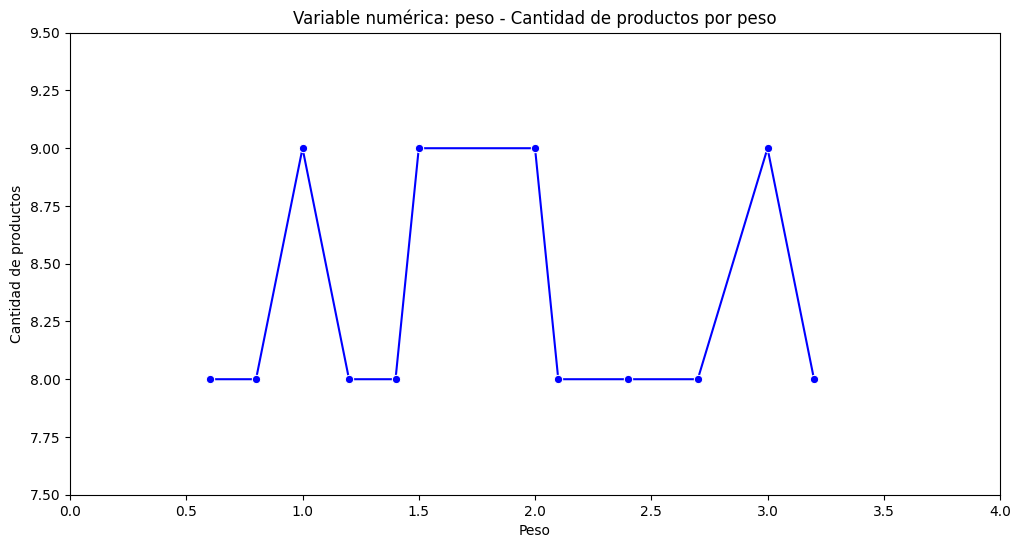

     id               product_name    price   colour  weight warehouse_id
0     1           Direwolf Stannis  $161.11  #7c7c7c     1.0         WH-4
1    10             Karstark Dorne  $119.52  #f4f4f4     2.4        WH--5
2   100                 south duel   $40.43  #6d6d6d     3.0       WH--95
3    11             Karstark Dorne   $49.70  #141414     2.7        WH--6
4    12              duel Direwolf  $181.60  #a8a8a8     2.1        WH--7
..  ...                        ...      ...      ...     ...          ...
95   95  riverlands north Direwolf    $6.90  #c1c1c1     2.7       WH--90
96   96                 dooku solo   $20.92  #282828     2.1       WH--91
97   97            jinn Winterfell   $65.25  #bababa     1.0       WH--92
98   98      Direwolf Littlefinger   $38.33  #bababa     2.0       WH--93
99   99                   the duel  $151.78  #212121     1.5       WH--94

[100 rows x 6 columns]


In [ ]:
# Cantidad de producto por peso 
df_weight_counts = df_products['weight'].value_counts().reset_index()
df_weight_counts.columns = ['weight', 'count']  # Renombro las columnas para mayor claridad

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_weight_counts,
    x='weight',
    y='count',  # Ahora paso la columna 'count' con los recuentos
    marker='o',
    color='blue'
)

plt.title("Variable numérica: peso - Cantidad de productos por peso")
plt.xlabel("Peso")
plt.ylabel("Cantidad de productos")
plt.xlim(0,4)
plt.ylim(7.5,9.5)
plt.show()

print(df_products)


** Ejercicio 2 <br>

** Dos variables numéricas.<br>



** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable<br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

1. 


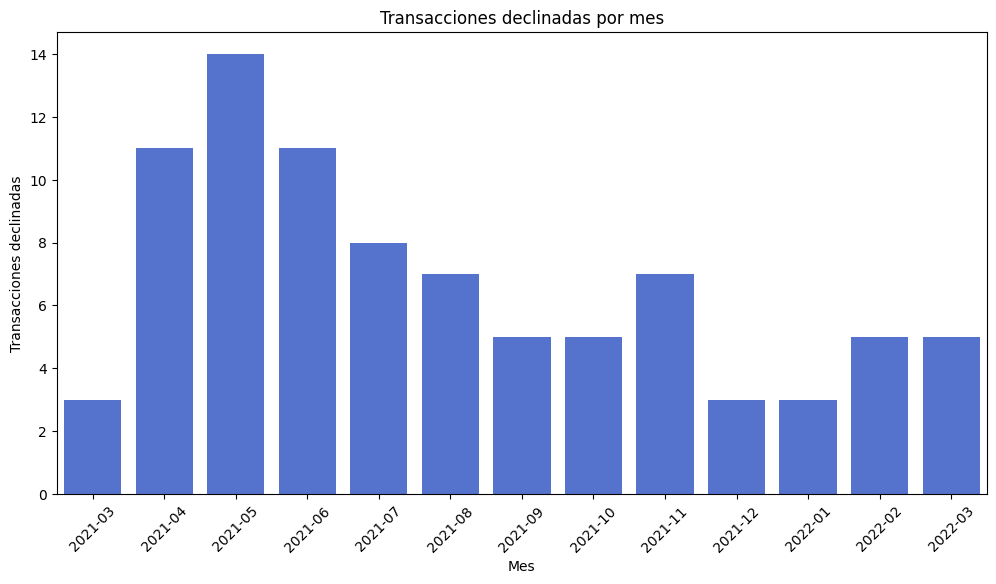

In [48]:
df_transactions['timestamp'] = pd.to_datetime(df_transactions['timestamp']) #cambiar formato de fecha 
df_transactions['year_month'] = df_transactions['timestamp'].dt.to_period('M') #extraer año y mes
df_monthly = df_transactions.groupby('year_month')['declined'].sum().reset_index() # agrupo la suma del amount por mes 

df_monthly['year_month'] = df_monthly['year_month'].astype(str)

plt.figure(figsize=(12,6))
sns.barplot(data=df_monthly, x='year_month', y='declined', color='royalblue')

plt.xticks(rotation=45)
plt.xlabel("Mes")
plt.ylabel("Transacciones declinadas")
plt.title("Transacciones declinadas por mes")
plt.show()

** Ejercicio 3 <br>

** Una variable categórica.<br>





** Explicación del código:<br>
   He seleccionado del df companies para calcular la cantidad de empresas que hay por país
 -- agregar el número de empresas que hay en cada pais, que me salga el número

** Comenta lo que llama la atención de graficar esta variable<br>
   Graficar esta variable me permite observar la cantidad de empresas que hay en cada pais 

** Justificación de la elección del gráfico <br>
   He utilizado el grafico Treemap para el cual he tenido que instalar la libreria squarify 
   
** Interpretación de los resultados en función de los datos<br>

1. 

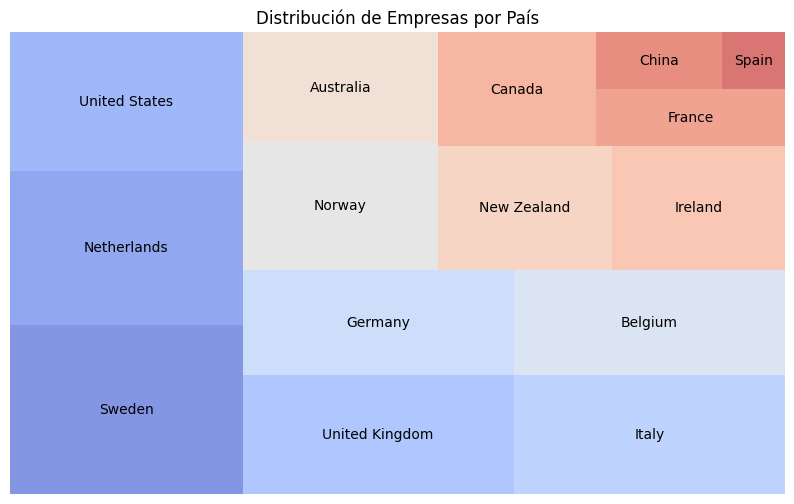

In [51]:
# Obtener la cantidad de empresas por país
df_country = df_companies['country'].value_counts().reset_index()
df_country.columns = ['country', 'count']

# Graficar Treemap
plt.figure(figsize=(10,6))
squarify.plot(
    sizes=df_country['count'], 
    label=df_country['country'], 
    alpha=0.7, 
    color=sns.color_palette("coolwarm", len(df_country))
)
plt.title("Distribución de Empresas por País")
plt.axis("off")  # Ocultar ejes
plt.show()

** Ejercicio 4 <br>

** Una variable categórica y una numérica.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable<br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

1. 

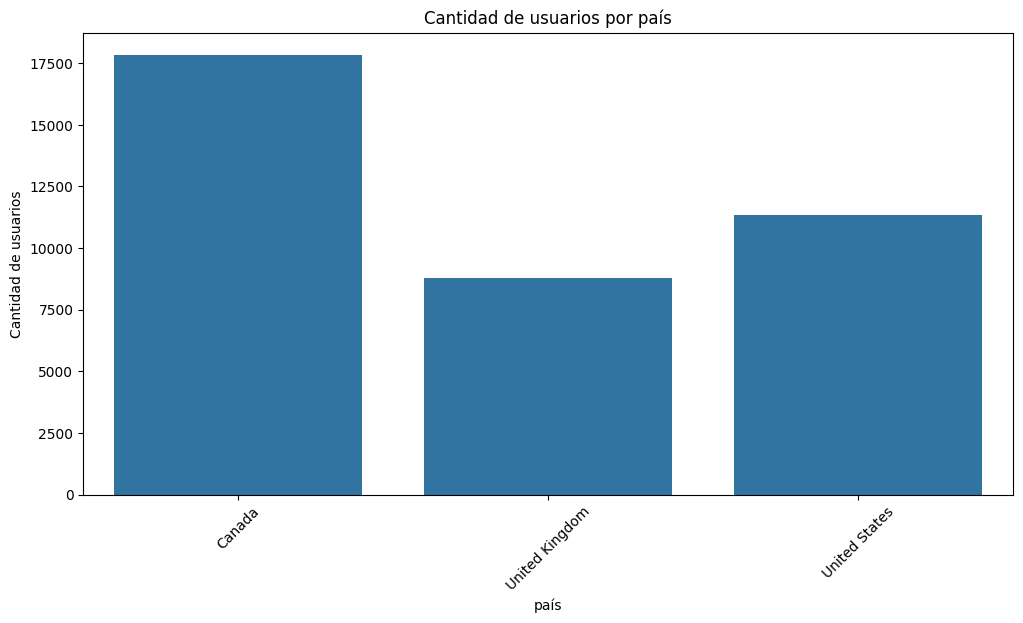

In [ ]:
usuario_pais= df_users.groupby('country')['id'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=usuario_pais, x='country', y='id')

plt.xticks(rotation=45)
plt.xlabel("país")
plt.ylabel("Cantidad de usuarios")
plt.title("Cantidad de usuarios por país")
plt.show()

** Ejercicio 5 <br>

** Dos variables categóricas.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable<br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

      name  surname  total_productos         Usuario
0   Hedwig  Gilbert              198  Hedwig Gilbert
1    Ocean   Nelson              124    Ocean Nelson
2   Kenyon  Hartman              116  Kenyon Hartman
3     Lynn   Riddle               89     Lynn Riddle
4  Brennan     Wynn               65    Brennan Wynn


C:\Users\formacio\AppData\Local\Temp\ipykernel_9568\2364867224.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_usuarios = pd.read_sql(query, conexion_bd)
C:\Users\formacio\AppData\Local\Temp\ipykernel_9568\2364867224.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_usuarios.head(5), x='Usuario', y='total_productos', palette="coolwarm")


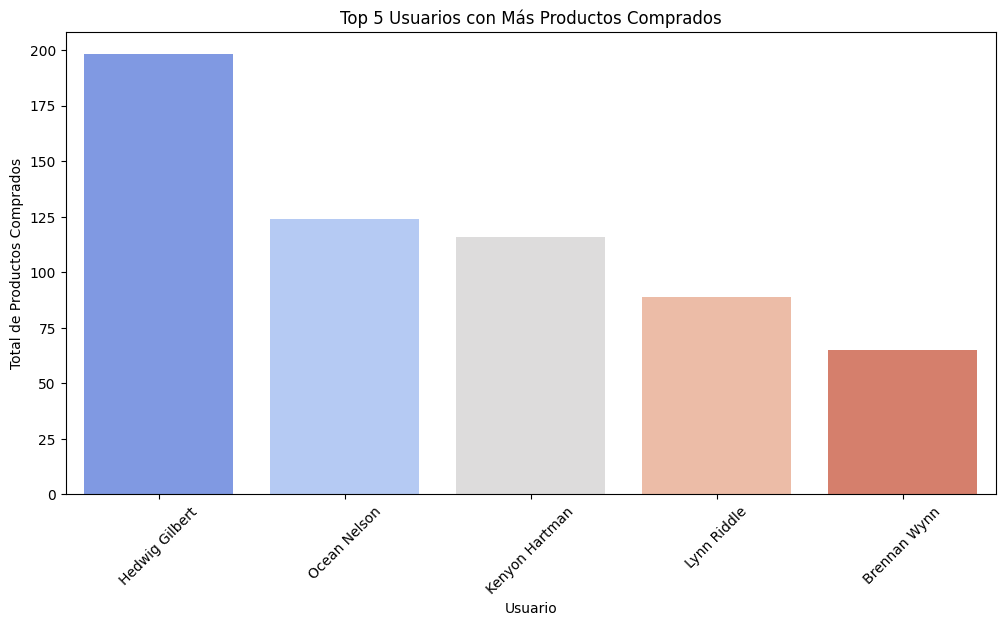

In [ ]:
# df_companyia = pd.merge(df_transactions, df_companies, left_on='business_id', right_on='company_id')

query = """SELECT name, surname, COUNT(product_id) as total_productos
FROM transactions 
JOIN users ON user_id = users.id
JOIN transactions_products ON transaction_id = transactions.id
Group by user_id, name, surname
ORDER BY total_productos DESC;"""

df_usuarios = pd.read_sql(query, conexion_bd)

#Concatenar nombre y apellido en una nueva columna
df_usuarios['Usuario'] = df_usuarios['name'] + " " + df_usuarios['surname']

#Mostrar los 10 usuarios con más productos comprados
print(df_usuarios.head(5))
plt.figure(figsize=(12,6))
sns.barplot(data=df_usuarios.head(5), x='Usuario', y='total_productos', palette="coolwarm")

plt.xticks(rotation=45)
plt.xlabel("Usuario")
plt.ylabel("Total de Productos Comprados")
plt.title("Top 5 Usuarios con Más Productos Comprados")

plt.show()

In [ ]:


# Paso 1: Unir transacciones con la tabla puente
df_total_productos = pd.merge(df_transactions, df_transactions_products, left_on='id', right_on='transaction_id')

# Paso 2: Unir con la tabla de productos
df_total_productos_1 = pd.merge(df_total_productos, df_users, left_on='user_id', right_on='id')

#Concatenar nombre y apellido en una nueva columna
df_total_productos_1['df_nombre_completo'] = df_total_productos_1['name'] + " " + df_total_productos_1['surname']

df_usuario_pais = df_total_productos_1.groupby('df_nombre_completo')['product_id'].value_counts().reset_index()
df_usuario_pais.columns = ['Usuario', 'product_id', 'total_productos']


#Mostrar los 5 usuarios con más productos comprados
print(df_usuario_pais.head(5))
plt.figure(figsize=(12,6))
sns.barplot(data=df_usuario_pais.head(5), x='Usuario', y='total_productos', palette="coolwarm")

plt.xticks(rotation=45)
plt.xlabel("Usuario")
plt.ylabel("Total de Productos Comprados")
plt.title("Top 5 Usuarios con Más Productos Comprados")

plt.show()

ValueError: Length mismatch: Expected axis has 3 elements, new values have 2 elements

** Ejercicio 6 <br>

** Tres variables.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable<br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

C:\Users\formacio\AppData\Local\Temp\ipykernel_9568\2739611236.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion_bd)


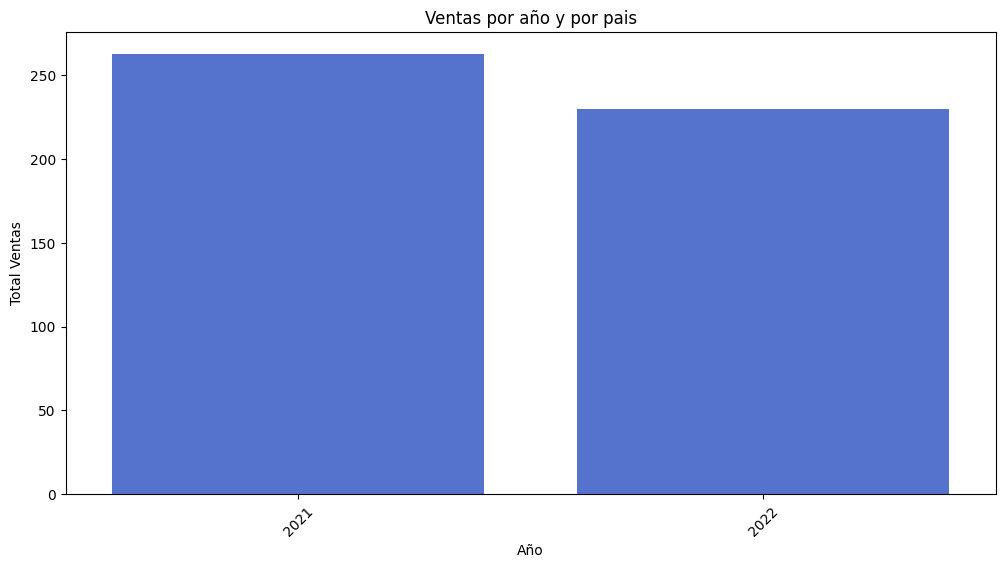

In [49]:
# Media de ventas por pais y por año

query = "SELECT * FROM transactions JOIN companies ON company_id = business_id;"
df = pd.read_sql(query, conexion_bd)


df['timestamp'] = pd.to_datetime(df['timestamp']) #cambiar formato de fecha 
df['year'] = df['timestamp'].dt.to_period('Y') #extraer año 
df_year = df.groupby('year')['amount'].mean().reset_index() # agrupo la media del amount por mes 

df_year['year'] = df_monthly['year'].astype(str)

plt.figure(figsize=(12,6))
sns.barplot(data=df_year, x= 'year', y='amount', color='royalblue')

plt.xticks(rotation=45)
plt.xlabel("Año")
plt.ylabel("Total Ventas")
plt.title("Ventas por año y por pais")
plt.show()


** Ejercicio 7 <br>

** Graficar un Pairplot.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable<br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

## Nivel 2
***
** Ejercicio 1 <br>

** Correlación de todas las variables numéricas.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable <br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos<br>

1. 


** Ejercicio 2 <br>

** Implementa un jointplot.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable <br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos <br>

## Nivel 3
***
** Ejercicio 1 <br>

** Implementa un violinplot combinado con otro tipo de gráfico.



** Explicación del código: <br>
** Comenta lo que llama la atención de graficar esta variable <br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos <br>

** Ejercicio 2 <br>

** Genera un FacetGrid para visualizar múltiples aspectos de datos simultáneamente.

** Explicación del código:<br>
** Comenta lo que llama la atención de graficar esta variable <br>
** Justificación de la elección del gráfico <br>
** Interpretación de los resultados en función de los datos <br>

In [ ]:
# cierro la BD
if conexion_bd.is_connected():
        cursor.close()
        conexion_bd.close()
        print("MySQL connection is closed")

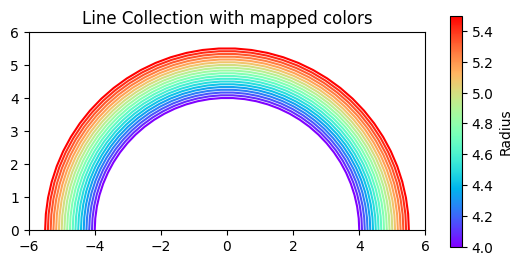

In [ ]:
from matplotlib.collections import LineCollection

num_arcs = 19
theta = np.linspace(0, np.pi, 36)
radii = np.linspace(4, 5.5, num=num_arcs)
arcs = [np.column_stack([r * np.cos(theta), r * np.sin(theta)]) for r in radii]

fig, ax = plt.subplots(figsize=(6.4, 3))
# set axes limits manually because Collections do not take part in autoscaling
ax.set_xlim(-6, 6)
ax.set_ylim(0, 6)
ax.set_aspect("equal")  # to make the arcs look circular

# create a LineCollection with the half-circles and color mapping
line_collection = LineCollection(arcs, array=radii, cmap="rainbow")
ax.add_collection(line_collection)

fig.colorbar(line_collection, label="Radius")
ax.set_title("Line Collection with mapped colors")

plt.show()

                                     id   card_id business_id  \
0  02C6201E-D90A-1859-B4EE-88D2986D3B02  CcU-2938      b-2362   
1  0466A42E-47CF-8D24-FD01-C0B689713128  CcU-4219      b-2302   
2  063FBA79-99EC-66FB-29F7-25726D1764A5  CcU-2987      b-2250   
3  0668296C-CDB9-A883-76BC-2E4C44F8C8AE  CcU-3743      b-2618   
4  06CD9AA5-9B42-D684-DDDD-A5E394FEBA99  CcU-2959      b-2346   

            timestamp  amount  declined    product_ids  user_id      lat  \
0 2021-08-28 23:42:24  466.92         0      71, 1, 19       92  81.9185   
1 2021-07-26 07:29:18   49.53         0     47, 97, 43      170 -43.9695   
2 2022-01-06 21:25:27   92.61         0  47, 67, 31, 5      275 -81.2227   
3 2022-01-26 02:07:14  394.18         0     89, 83, 79      265 -34.3593   
4 2021-10-26 23:00:01  279.93         0         43, 31       92  33.7381   

   longitude  
0   -12.5276  
1  -117.5250  
2  -129.0500  
3  -100.5560  
4   158.2980  


C:\Users\formacio\AppData\Local\Temp\ipykernel_3788\17115837.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion_bd)


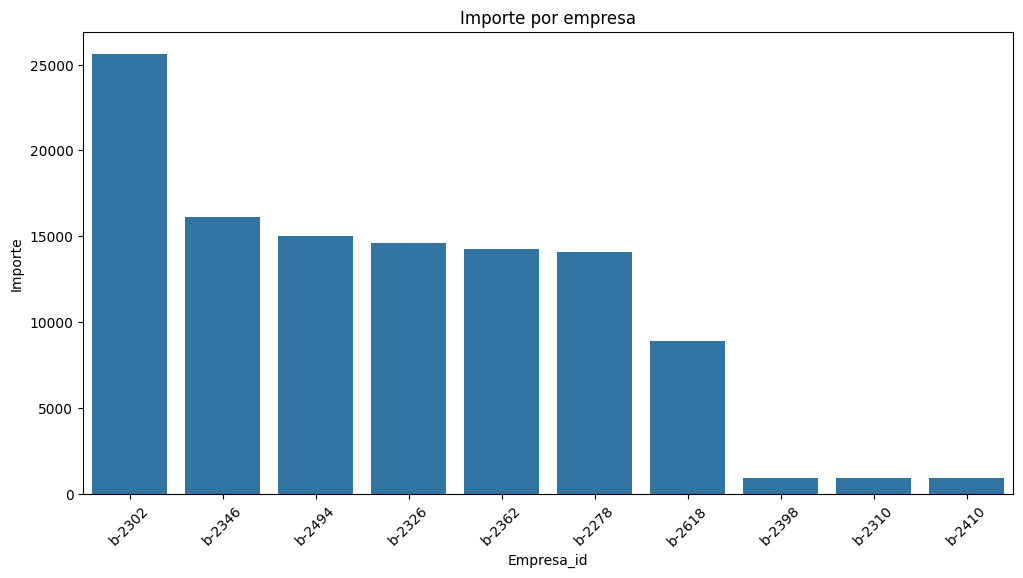

In [17]:
# querys para visualizar los datos de las tablas cargadas
query = "SELECT * FROM transactions;"
df = pd.read_sql(query, conexion_bd)
print(df.head())

importe_empresa_id= df.groupby('business_id')['amount'].sum().reset_index()
top_n=10
df_top=importe_empresa_id.nlargest(top_n,'amount')

plt.figure(figsize=(12,6))
sns.barplot(data=df_top, x='business_id', y='amount')

plt.xticks(rotation=45)
plt.xlabel("Empresa_id")
plt.ylabel("Importe")
plt.title("Importe por empresa")
plt.show()

                                     id   card_id business_id  \
0  108B1D1D-5B23-A76C-55EF-C568E49A05DD  CcU-2938      b-2222   
1  EA2C3281-C9C1-A387-44F8-729FB4B51C76  CcU-2938      b-2222   
2  7DC26247-20EC-53FE-E555-B6C2E55CA5D5  CcU-2945      b-2226   
3  FE96CE47-BD59-381C-4E18-E3CA3D44E8FF  CcU-2945      b-2226   
4  72997E96-DC2C-A4D7-7C24-66C302F8AE5A  CcU-2952      b-2230   

            timestamp  amount  declined     product_ids  user_id      lat  \
0 2021-07-07 17:43:16  293.57         0              59      275  83.7839   
1 2021-05-09 10:25:08  119.36         1  59, 79, 37, 73      275  20.2004   
2 2022-02-04 15:52:56  312.50         0          71, 41      275  58.9367   
3 2021-06-15 00:26:29  480.13         1               3      275 -21.8805   
4 2022-01-30 15:16:36  239.87         0       97, 41, 3      275  43.3584   

   longitude company_id               company_name           phone  \
0  -178.8600     b-2222  Ac Fermentum Incorporated  06 85 56 52 33   
1  -11

C:\Users\formacio\AppData\Local\Temp\ipykernel_3788\3442046912.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion_bd)


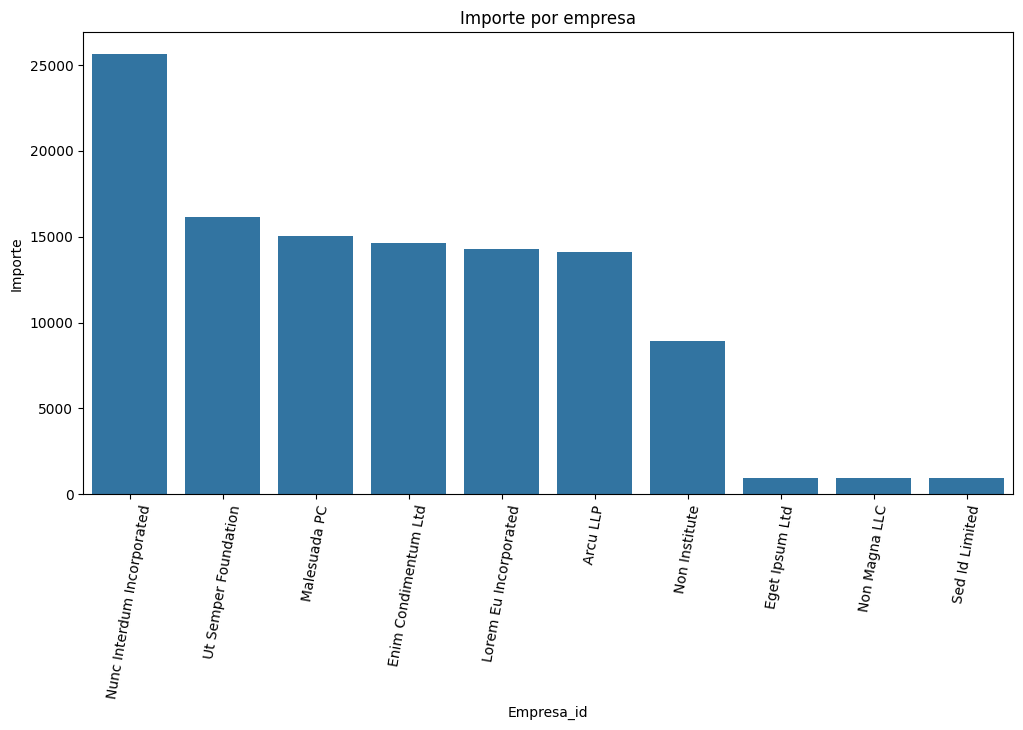

In [18]:
# querys para visualizar los datos de las tablas cargadas
query = "SELECT * FROM transactions JOIN companies ON company_id = business_id;"

df = pd.read_sql(query, conexion_bd)
print(df.head())

importe_empresa_id= df.groupby('company_name')['amount'].sum().reset_index()
top_n=10
df_top=importe_empresa_id.nlargest(top_n,'amount')

plt.figure(figsize=(12,6))
sns.barplot(data=df_top, x='company_name', y='amount')

plt.xticks(rotation=80)
plt.xlabel("Empresa_id")
plt.ylabel("Importe")
plt.title("Importe por empresa")
plt.show()

C:\Users\formacio\AppData\Local\Temp\ipykernel_3788\1831035798.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion_bd)


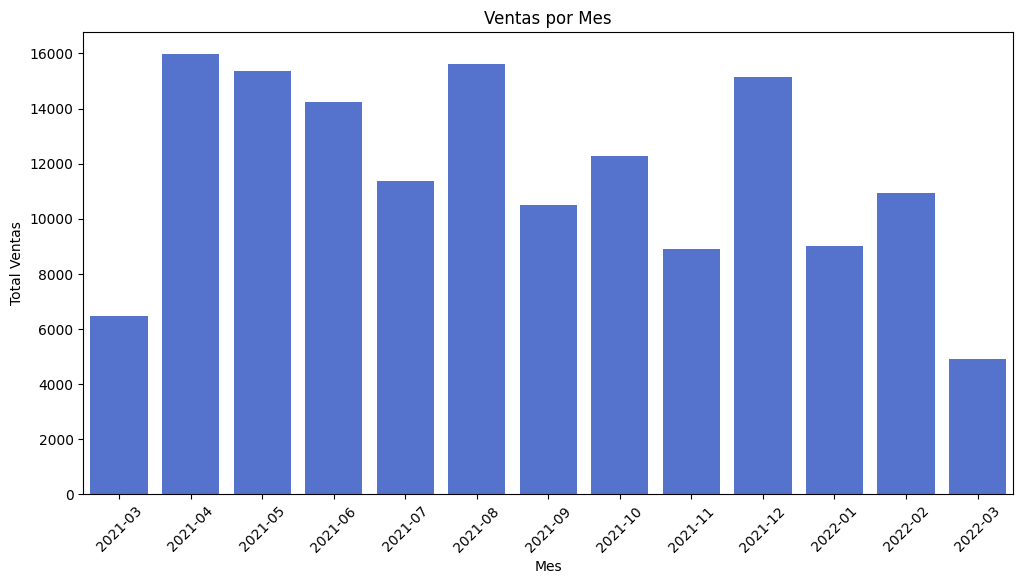

In [25]:
query = "SELECT * FROM transactions;"
df = pd.read_sql(query, conexion_bd)


df['timestamp'] = pd.to_datetime(df['timestamp']) #cambiar formato de fecha 
df['year_month'] = df['timestamp'].dt.to_period('M') #extraer año y mes
df_monthly = df.groupby('year_month')['amount'].sum().reset_index() # agrupo la suma del amount por mes 

df_monthly['year_month'] = df_monthly['year_month'].astype(str)

plt.figure(figsize=(12,6))
sns.barplot(data=df_monthly, x='year_month', y='amount', color='royalblue')

plt.xticks(rotation=45)
plt.xlabel("Mes")
plt.ylabel("Total Ventas")
plt.title("Ventas por Mes")
plt.show()

C:\Users\formacio\AppData\Local\Temp\ipykernel_3788\130331707.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conexion_bd)


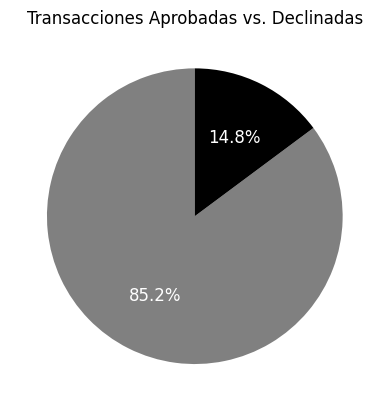

In [44]:
query = "SELECT declined FROM transactions;"
df = pd.read_sql(query, conexion_bd)

df_declined_counts = df['declined'].map({1: 'Declinadas', 0: 'Aprobadas'}).value_counts()
labels = df_declined_counts.index
colors = ['grey', 'black']

plt.pie(
    df_declined_counts, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors,
    textprops={'color': 'white', 'fontsize': 12} 
)
plt.title("Transacciones Aprobadas vs. Declinadas")
plt.show()